## 任务

1；采用Kmeans算法实现2D数据自动聚类，预测 v1 = 80 , v2 = 60 数据类别；

2；计算预测准确率 ， 完成结果矫正；

3；采用KNN , Meanshift 算法 ， 重复步骤1-2

数据；data.csv


### 任务1


In [3]:
#load the data
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')
data.head()

,V1,V2,labels
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


In [4]:
#define X and Y 
X = data.drop(['labels'] , axis = 1)
Y = data.loc[: , 'labels']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: labels, dtype: int64

In [5]:
pd.value_counts(Y)

labels
2    1156
1     954
0     890
Name: count, dtype: int64

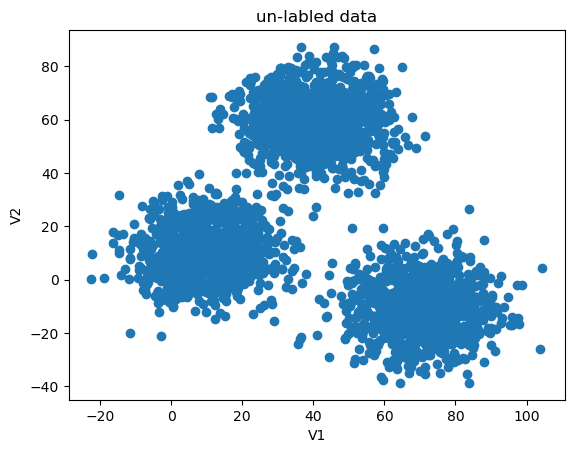

In [6]:
#visualize the data
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(X.loc[: , 'V1'] , X.loc[: , 'V2'])
plt.title('un-labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()
            

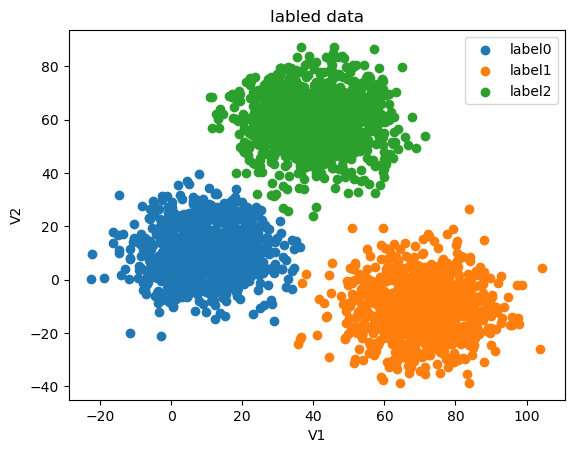

In [7]:
#orginal data visualize
fig2 = plt.figure()
label0 = plt.scatter(X.loc[: , 'V1'][Y == 0] , X.loc[: , 'V2'][Y==0])
label1 = plt.scatter(X.loc[: , 'V1'][Y == 1] , X.loc[: , 'V2'][Y==1])
label2 = plt.scatter(X.loc[: , 'V1'][Y == 2] , X.loc[: , 'V2'][Y==2])

plt.title('labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0 , label1 , label2),('label0' , 'label1' , 'label2'))
plt.show()

In [8]:
print(X.shape , Y.shape)

(3000, 2) (3000,)


In [9]:
# set the model
from sklearn.cluster import KMeans 
KM = KMeans(n_clusters=3 , random_state=0)
KM.fit(X)

C:\Users\Nurbek\anaconda3_new\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

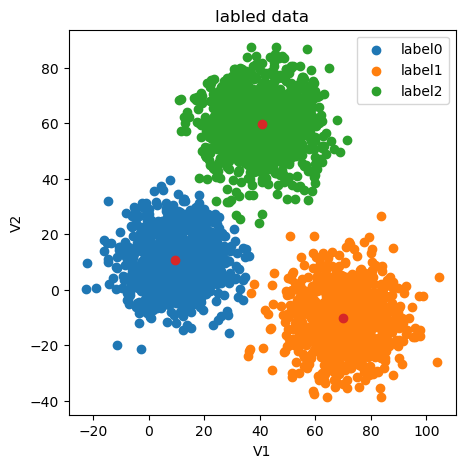

In [10]:
centers = KM.cluster_centers_

fig3 = plt.figure(figsize= (5,5))
label0 = plt.scatter(X.loc[: , 'V1'][Y == 0] , X.loc[: , 'V2'][Y==0])
label1 = plt.scatter(X.loc[: , 'V1'][Y == 1] , X.loc[: , 'V2'][Y==1])
label2 = plt.scatter(X.loc[: , 'V1'][Y == 2] , X.loc[: , 'V2'][Y==2])

plt.title('labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0 , label1 , label2),('label0' , 'label1' , 'label2'))
plt.scatter( centers[: , 0] , centers[: , 1])
plt.show()

In [11]:
#test data : V1 = 80 , V2 = 60
y_predict_test = KM.predict([[80,60]])
print(y_predict_test)

[0]


C:\Users\Nurbek\anaconda3_new\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


### 任务2

In [12]:
#predict based on training data
y_predict = KM.predict(X)
print(pd.value_counts(y_predict)  , pd.value_counts(Y))

0    1149
1     952
2     899
Name: count, dtype: int64 labels
2    1156
1     954
0     890
Name: count, dtype: int64


In [13]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y , y_predict)
print(accuracy)

0.31966666666666665


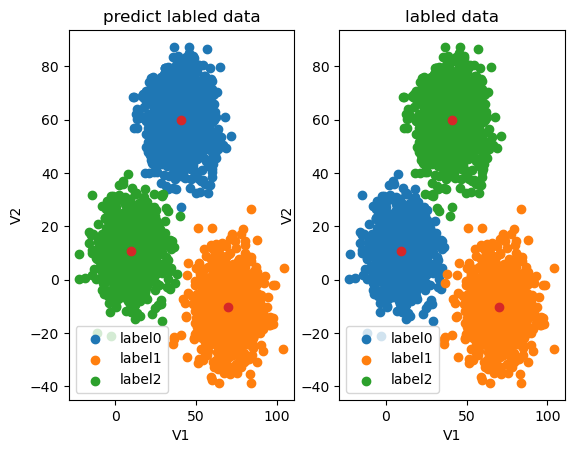

In [14]:
#visualize the data and results

fig4 = plt.subplot(121)
label0 = plt.scatter(X.loc[: , 'V1'][y_predict == 0] , X.loc[: , 'V2'][y_predict==0])
label1 = plt.scatter(X.loc[: , 'V1'][y_predict == 1] , X.loc[: , 'V2'][y_predict==1])
label2 = plt.scatter(X.loc[: , 'V1'][y_predict == 2] , X.loc[: , 'V2'][y_predict==2])
plt.title('predict labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0 , label1 , label2),('label0' , 'label1' , 'label2'))
plt.scatter( centers[: , 0] , centers[: , 1])




fig5 = plt.subplot(122)
label0 = plt.scatter(X.loc[: , 'V1'][Y == 0] , X.loc[: , 'V2'][Y==0])
label1 = plt.scatter(X.loc[: , 'V1'][Y == 1] , X.loc[: , 'V2'][Y==1])
label2 = plt.scatter(X.loc[: , 'V1'][Y == 2] , X.loc[: , 'V2'][Y==2])
plt.title('labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0 , label1 , label2),('label0' , 'label1' , 'label2'))
plt.scatter( centers[: , 0] , centers[: , 1])


plt.show()

In [15]:
#correct the results
y_corrected = []
for i in y_predict:
    if i == 0:
        y_corrected.append(2)
    elif i == 2:
        y_corrected.append(0)
    else:
        y_corrected.append(1)
print(pd.value_counts(y_corrected), pd.value_counts(Y))


2    1149
1     952
0     899
Name: count, dtype: int64 labels
2    1156
1     954
0     890
Name: count, dtype: int64


In [16]:
print(accuracy_score(Y , y_corrected))

0.997


In [17]:
y_corrected = np.array(y_corrected)
print(y_corrected , type(y_corrected))

[0 0 0 ... 1 1 1] <class 'numpy.ndarray'>


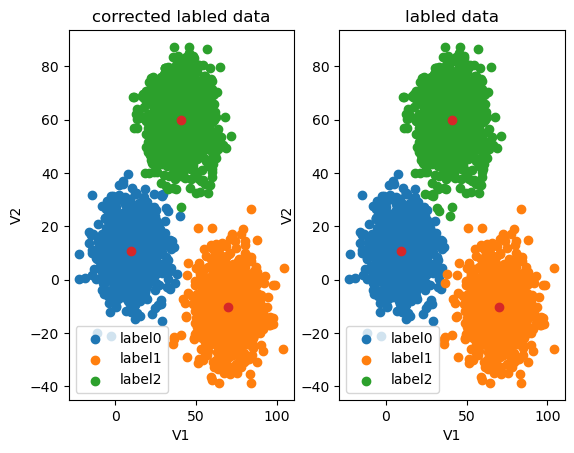

In [18]:
#visualize the data and correctly results

fig5 = plt.subplot(121)
label0 = plt.scatter(X.loc[: , 'V1'][y_corrected == 0] , X.loc[: , 'V2'][y_corrected==0])
label1 = plt.scatter(X.loc[: , 'V1'][y_corrected == 1] , X.loc[: , 'V2'][y_corrected==1])
label2 = plt.scatter(X.loc[: , 'V1'][y_corrected== 2] , X.loc[: , 'V2'][y_corrected==2])
plt.title('corrected labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0 , label1 , label2),('label0' , 'label1' , 'label2'))
plt.scatter( centers[: , 0] , centers[: , 1])




fig5 = plt.subplot(122)
label0 = plt.scatter(X.loc[: , 'V1'][Y == 0] , X.loc[: , 'V2'][Y==0])
label1 = plt.scatter(X.loc[: , 'V1'][Y == 1] , X.loc[: , 'V2'][Y==1])
label2 = plt.scatter(X.loc[: , 'V1'][Y == 2] , X.loc[: , 'V2'][Y==2])
plt.title('labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0 , label1 , label2),('label0' , 'label1' , 'label2'))
plt.scatter( centers[: , 0] , centers[: , 1])
plt.show()

### 任务3

In [22]:
# establish a KNN model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 3)
KNN.fit(X , Y)


KNeighborsClassifier(n_neighbors=3)

In [23]:
# predict based on the test data V1 = 80 , V2 = 60
y_predict_knn_test = KNN.predict([[80 , 60]])
y_predict_knn = KNN.predict(X)
print(y_predict_knn_test)
print('knn accuracy:' , accuracy_score(Y , y_predict_knn))

[2]
knn accuracy: 1.0


C:\Users\Nurbek\anaconda3_new\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [24]:
print(pd.value_counts(y_predict_knn) , pd.value_counts(Y))

2    1156
1     954
0     890
Name: count, dtype: int64 labels
2    1156
1     954
0     890
Name: count, dtype: int64


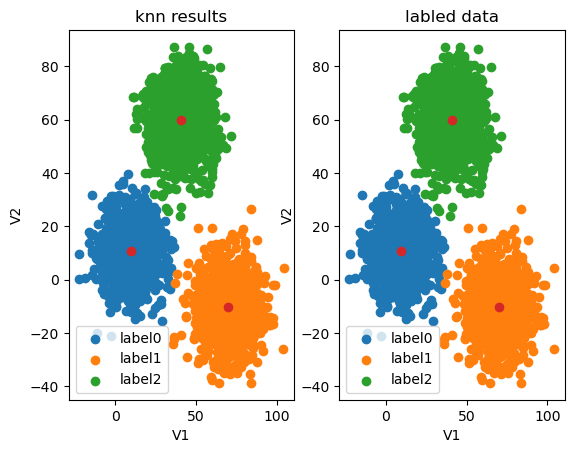

In [25]:
fig5 = plt.subplot(121)
label0 = plt.scatter(X.loc[: , 'V1'][y_predict_knn == 0] , X.loc[: , 'V2'][y_predict_knn==0])
label1 = plt.scatter(X.loc[: , 'V1'][y_predict_knn == 1] , X.loc[: , 'V2'][y_predict_knn==1])
label2 = plt.scatter(X.loc[: , 'V1'][y_predict_knn== 2] , X.loc[: , 'V2'][y_predict_knn==2])
plt.title('knn results')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0 , label1 , label2),('label0' , 'label1' , 'label2'))
plt.scatter( centers[: , 0] , centers[: , 1])




fig5 = plt.subplot(122)
label0 = plt.scatter(X.loc[: , 'V1'][Y == 0] , X.loc[: , 'V2'][Y==0])
label1 = plt.scatter(X.loc[: , 'V1'][Y == 1] , X.loc[: , 'V2'][Y==1])
label2 = plt.scatter(X.loc[: , 'V1'][Y == 2] , X.loc[: , 'V2'][Y==2])
plt.title('labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0 , label1 , label2),('label0' , 'label1' , 'label2'))
plt.scatter( centers[: , 0] , centers[: , 1])
plt.show()

In [32]:
# try the meanshift model
from sklearn.cluster import MeanShift,estimate_bandwidth

# obtain the bandwidth (获取带宽,半径)
bw = estimate_bandwidth(X , n_samples = 500)
print(bw)

30.84663454820215


In [34]:
# establish the meanshift model
ms = MeanShift(bandwidth = bw)
ms.fit(X)

MeanShift(bandwidth=30.84663454820215)

In [36]:
y_predict_ms = ms.predict(X)
print(pd.value_counts(y_predict_ms),pd.value_counts(Y))

0    1149
1     952
2     899
Name: count, dtype: int64 labels
2    1156
1     954
0     890
Name: count, dtype: int64


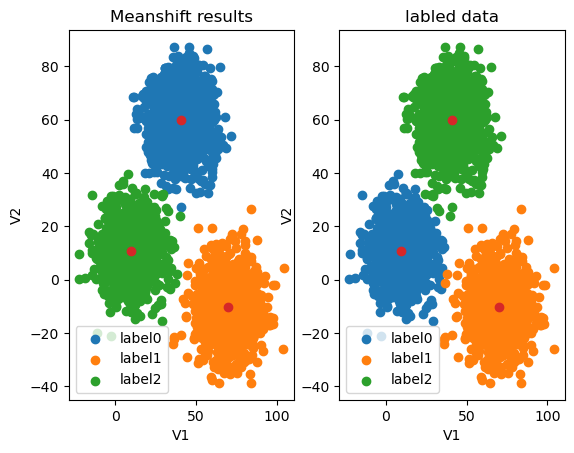

In [37]:
fig5 = plt.subplot(121)
label0 = plt.scatter(X.loc[: , 'V1'][y_predict_ms == 0] , X.loc[: , 'V2'][y_predict_ms==0])
label1 = plt.scatter(X.loc[: , 'V1'][y_predict_ms == 1] , X.loc[: , 'V2'][y_predict_ms==1])
label2 = plt.scatter(X.loc[: , 'V1'][y_predict_ms== 2] , X.loc[: , 'V2'][y_predict_ms==2])
plt.title('Meanshift results')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0 , label1 , label2),('label0' , 'label1' , 'label2'))
plt.scatter( centers[: , 0] , centers[: , 1])




fig5 = plt.subplot(122)
label0 = plt.scatter(X.loc[: , 'V1'][Y == 0] , X.loc[: , 'V2'][Y==0])
label1 = plt.scatter(X.loc[: , 'V1'][Y == 1] , X.loc[: , 'V2'][Y==1])
label2 = plt.scatter(X.loc[: , 'V1'][Y == 2] , X.loc[: , 'V2'][Y==2])
plt.title('labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0 , label1 , label2),('label0' , 'label1' , 'label2'))
plt.scatter( centers[: , 0] , centers[: , 1])
plt.show()

In [39]:
#correct the ms results
y_corrected_ms = []
for i in y_predict:
    if i == 0:
        y_corrected_ms.append(2)
    elif i == 2:
        y_corrected_ms.append(0)
    else:
        y_corrected_ms.append(1)
print(pd.value_counts(y_corrected_ms), pd.value_counts(Y))


2    1149
1     952
0     899
Name: count, dtype: int64 labels
2    1156
1     954
0     890
Name: count, dtype: int64


In [41]:
#convert the results to numpy array
y_corrected_ms = np.array(y_corrected_ms)
print(type(y_corrected_ms))



<class 'numpy.ndarray'>


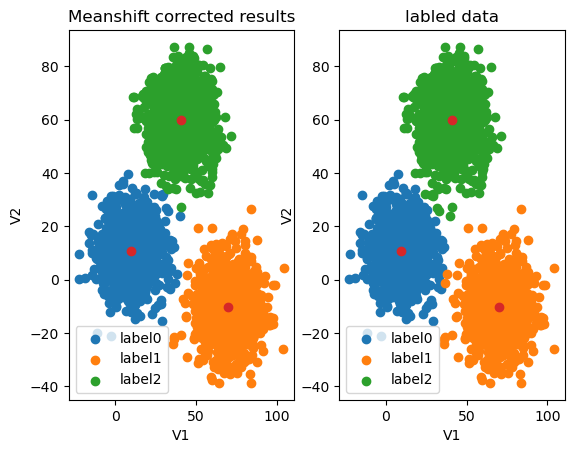

In [42]:
fig5 = plt.subplot(121)
label0 = plt.scatter(X.loc[: , 'V1'][y_corrected_ms == 0] , X.loc[: , 'V2'][y_corrected_ms==0])
label1 = plt.scatter(X.loc[: , 'V1'][y_corrected_ms == 1] , X.loc[: , 'V2'][y_corrected_ms==1])
label2 = plt.scatter(X.loc[: , 'V1'][y_corrected_ms== 2] , X.loc[: , 'V2'][y_corrected_ms==2])
plt.title('Meanshift corrected results')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0 , label1 , label2),('label0' , 'label1' , 'label2'))
plt.scatter( centers[: , 0] , centers[: , 1])




fig5 = plt.subplot(122)
label0 = plt.scatter(X.loc[: , 'V1'][Y == 0] , X.loc[: , 'V2'][Y==0])
label1 = plt.scatter(X.loc[: , 'V1'][Y == 1] , X.loc[: , 'V2'][Y==1])
label2 = plt.scatter(X.loc[: , 'V1'][Y == 2] , X.loc[: , 'V2'][Y==2])
plt.title('labled data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0 , label1 , label2),('label0' , 'label1' , 'label2'))
plt.scatter( centers[: , 0] , centers[: , 1])
plt.show()